In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [75]:
df1 = pd.read_csv('/content/Stunting_Dataset.csv')
df2 = pd.read_csv('/content/child_data_rev.csv')
df3 = pd.read_excel('/content/Stunting Dataset.xlsx')

In [76]:
df1

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes
...,...,...,...,...,...,...,...,...
9995,Male,15,3.0,49,9.0,63.0,No,Yes
9996,Female,12,2.8,48,7.7,63.0,No,No
9997,Male,16,2.8,49,7.7,49.0,No,No
9998,Male,14,2.8,49,10.0,69.0,No,Yes


In [77]:
df1 = df1.rename(columns={"Gender": "Sex", "Body Weight": "Weight", "Body Length": "Length"})

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Weight         10000 non-null  float64
 5   Length         10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [79]:
df1.describe()

,Age,Birth Weight,Birth Length,Weight,Length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,14.255000,2.757600,49.117400,7.631990,68.85492
std,7.923285,0.291092,0.439814,1.720461,8.90664
min,6.000000,2.000000,48.000000,2.900000,49.00000
25%,10.000000,2.800000,49.000000,6.400000,65.00000
50%,13.000000,2.800000,49.000000,7.700000,68.30000
75%,15.000000,2.900000,49.000000,9.000000,72.20000
max,48.000000,3.100000,50.000000,10.500000,92.70000


In [80]:
df2

,Name,Sex,Age,Height,Weight,Status
0,Ffion Winter,Female,5,100,11,Underweight
1,Anya Singleton,Female,3,97,15,Normal
2,Elisha Acevedo,Female,3,100,18,Overweight
3,Caroline Miles,Female,3,77,12,Stunting
4,Bryony Cameron,Female,1,94,10,Normal
...,...,...,...,...,...,...
95,Jak Koch,Male,4,99,16,Normal
96,Virginia Montgomery,Male,4,85,16,Normal
97,Hussein Delacruz,Male,4,93,17,Normal
98,Yaseen Nelson,Male,2,78,13,Stunting


In [81]:
set(df2["Status"])

{'Normal', 'Overweight', 'Stunting', 'Underweight'}

In [82]:
df2.drop(["Name"], inplace=True, axis=1)

In [83]:
df2["Status"] = df2["Status"].replace({"Normal": "No", "Overweight": "No", "Underweight": "No", "Stunting": "Yes"})
df2

,Sex,Age,Height,Weight,Status
0,Female,5,100,11,No
1,Female,3,97,15,No
2,Female,3,100,18,No
3,Female,3,77,12,Yes
4,Female,1,94,10,No
...,...,...,...,...,...
95,Male,4,99,16,No
96,Male,4,85,16,No
97,Male,4,93,17,No
98,Male,2,78,13,Yes


In [84]:
df2 = df2.rename(columns={"Status": "Stunting", "Height": "Length"})

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       100 non-null    object
 1   Age       100 non-null    int64 
 2   Length    100 non-null    int64 
 3   Weight    100 non-null    int64 
 4   Stunting  100 non-null    object
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


In [86]:
df2.describe()

,Age,Length,Weight
count,100.000000,100.000000,100.000000
mean,2.900000,88.530000,14.190000
std,1.403459,10.757619,3.469041
min,1.000000,70.000000,9.000000
25%,2.000000,79.000000,11.000000
50%,3.000000,89.000000,14.000000
75%,4.000000,99.000000,17.000000
max,5.000000,107.000000,20.000000


In [87]:
df3

,Sex,Age,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,F,56,2.9,50,11.0,90.0,Yes,No
1,F,20,3.3,49,11.1,80.5,No,No
2,M,4,2.8,48,6.5,63.0,No,No
3,F,14,2.0,49,7.0,71.0,Yes,No
4,M,32,3.2,49,11.0,88.7,Yes,No
...,...,...,...,...,...,...,...,...
6495,M,53,2.9,49,15.0,96.0,No,Yes
6496,M,9,2.9,50,7.3,62.0,No,Yes
6497,F,20,1.8,48,7.3,73.0,Yes,Yes
6498,M,11,2.9,49,7.7,66.0,No,Yes


In [88]:
df3["Sex"] = df3["Sex"].replace({"F": "Female", "M": "Male"})
df3

,Sex,Age,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,Female,56,2.9,50,11.0,90.0,Yes,No
1,Female,20,3.3,49,11.1,80.5,No,No
2,Male,4,2.8,48,6.5,63.0,No,No
3,Female,14,2.0,49,7.0,71.0,Yes,No
4,Male,32,3.2,49,11.0,88.7,Yes,No
...,...,...,...,...,...,...,...,...
6495,Male,53,2.9,49,15.0,96.0,No,Yes
6496,Male,9,2.9,50,7.3,62.0,No,Yes
6497,Female,20,1.8,48,7.3,73.0,Yes,Yes
6498,Male,11,2.9,49,7.7,66.0,No,Yes


In [89]:
df3 = df3.rename(columns={"Body Weight": "Weight", "Body Length": "Length", "ASI Eksklusif": "Breastfeeding"})
df3

,Sex,Age,Birth Weight,Birth Length,Weight,Length,Breastfeeding,Stunting
0,Female,56,2.9,50,11.0,90.0,Yes,No
1,Female,20,3.3,49,11.1,80.5,No,No
2,Male,4,2.8,48,6.5,63.0,No,No
3,Female,14,2.0,49,7.0,71.0,Yes,No
4,Male,32,3.2,49,11.0,88.7,Yes,No
...,...,...,...,...,...,...,...,...
6495,Male,53,2.9,49,15.0,96.0,No,Yes
6496,Male,9,2.9,50,7.3,62.0,No,Yes
6497,Female,20,1.8,48,7.3,73.0,Yes,Yes
6498,Male,11,2.9,49,7.7,66.0,No,Yes


In [90]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            6500 non-null   object 
 1   Age            6500 non-null   int64  
 2   Birth Weight   6500 non-null   float64
 3   Birth Length   6500 non-null   int64  
 4   Weight         6500 non-null   float64
 5   Length         6500 non-null   float64
 6   Breastfeeding  6500 non-null   object 
 7   Stunting       6500 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 406.4+ KB


In [91]:
df3.describe()

,Age,Birth Weight,Birth Length,Weight,Length
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,25.222000,2.985092,49.136923,9.809769,79.389785
std,16.961179,0.349956,1.258554,3.459952,14.073021
min,1.000000,1.800000,42.000000,2.900000,53.000000
25%,11.000000,2.900000,49.000000,7.100000,68.900000
50%,20.000000,3.000000,49.000000,9.000000,77.000000
75%,39.000000,3.200000,50.000000,12.000000,92.000000
max,59.000000,4.000000,53.000000,24.500000,111.000000


In [92]:
temp_df = pd.concat([df1, df2, df3], ignore_index=True)
temp_df

,Sex,Age,Birth Weight,Birth Length,Weight,Length,Breastfeeding,Stunting
0,Male,17,3.0,49.0,10.0,72.2,No,No
1,Female,11,2.9,49.0,2.9,65.0,No,Yes
2,Male,16,2.9,49.0,8.5,72.2,No,Yes
3,Male,31,2.8,49.0,6.4,63.0,No,Yes
4,Male,15,3.1,49.0,10.5,49.0,No,Yes
...,...,...,...,...,...,...,...,...
16595,Male,53,2.9,49.0,15.0,96.0,No,Yes
16596,Male,9,2.9,50.0,7.3,62.0,No,Yes
16597,Female,20,1.8,48.0,7.3,73.0,Yes,Yes
16598,Male,11,2.9,49.0,7.7,66.0,No,Yes


In [93]:
temp_df.drop(["Birth Weight", "Birth Length"], inplace=True, axis=1)
temp_df

,Sex,Age,Weight,Length,Breastfeeding,Stunting
0,Male,17,10.0,72.2,No,No
1,Female,11,2.9,65.0,No,Yes
2,Male,16,8.5,72.2,No,Yes
3,Male,31,6.4,63.0,No,Yes
4,Male,15,10.5,49.0,No,Yes
...,...,...,...,...,...,...
16595,Male,53,15.0,96.0,No,Yes
16596,Male,9,7.3,62.0,No,Yes
16597,Female,20,7.3,73.0,Yes,Yes
16598,Male,11,7.7,66.0,No,Yes


In [94]:
features = temp_df.columns

for feature in features:
  null_feature = (temp_df[feature] == None).sum()
  print(f"Nilai 0 pada kolom {feature}: {null_feature}")

Nilai 0 pada kolom Sex: 0
Nilai 0 pada kolom Age: 0
Nilai 0 pada kolom Weight: 0
Nilai 0 pada kolom Length: 0
Nilai 0 pada kolom Breastfeeding: 0
Nilai 0 pada kolom Stunting: 0


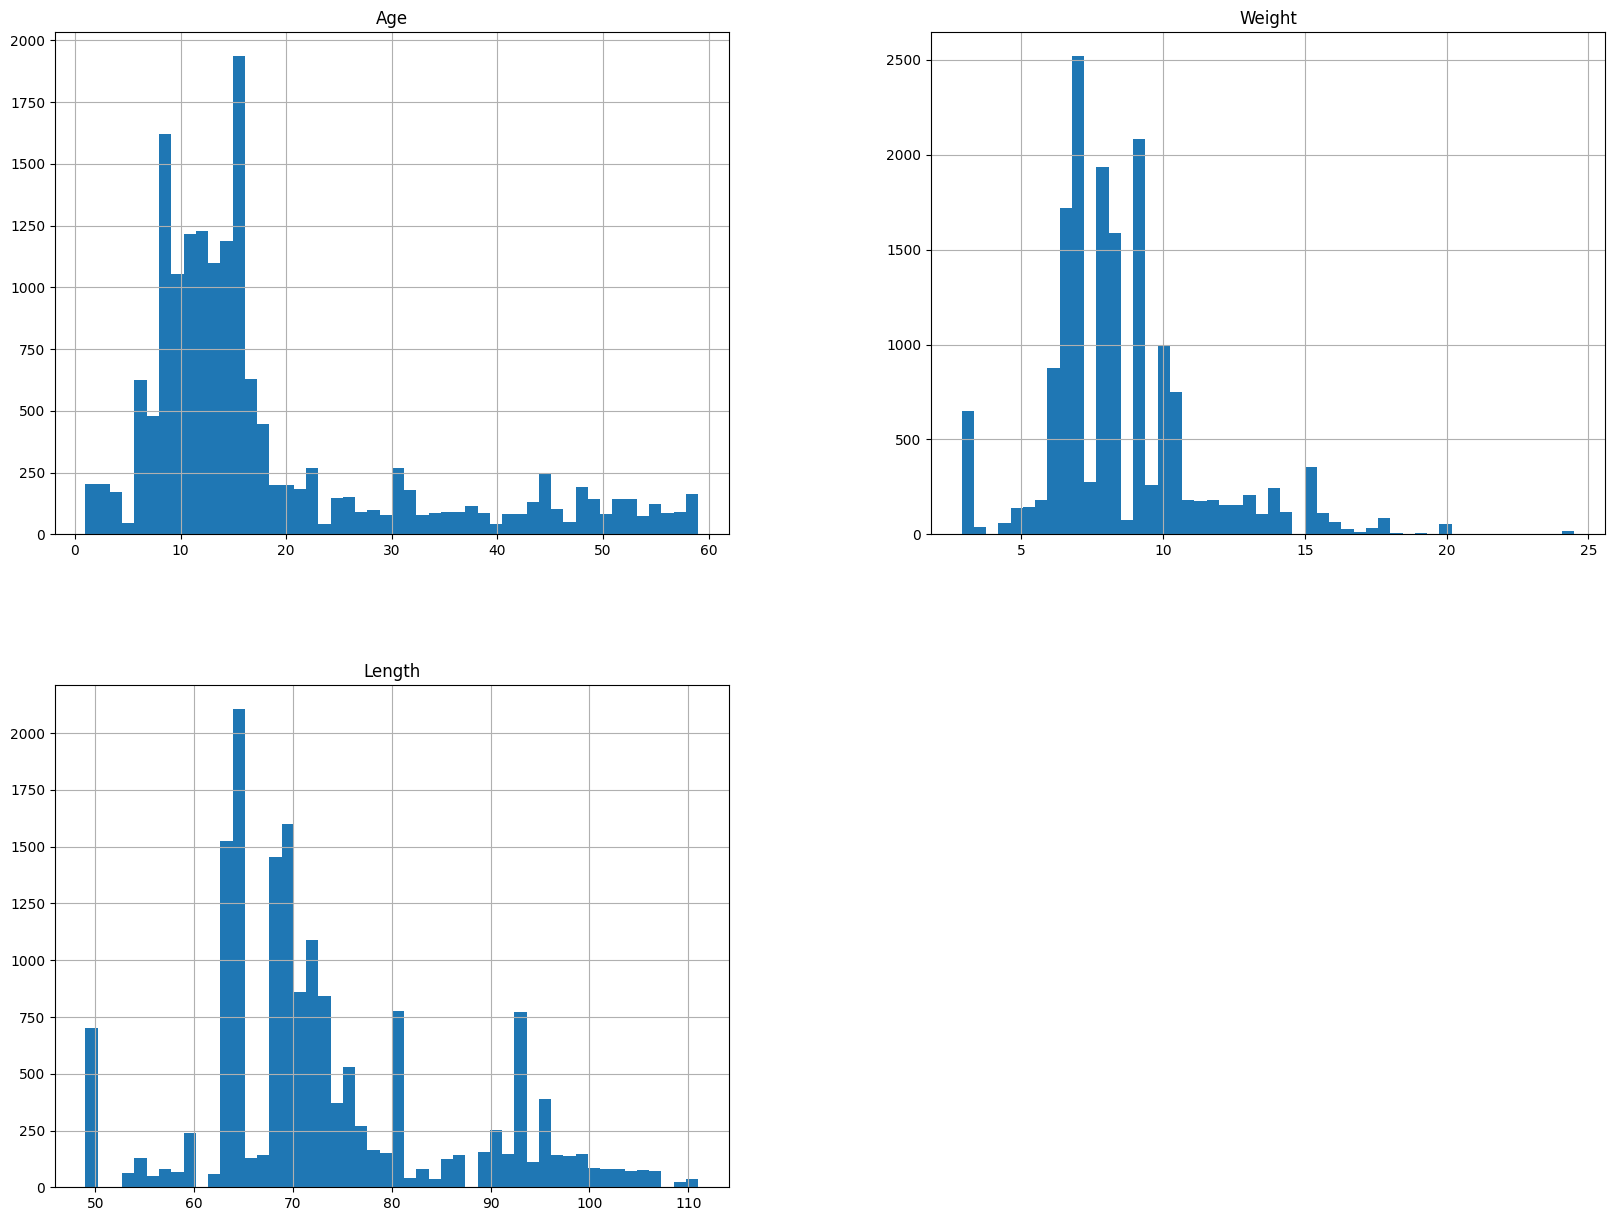

In [95]:
temp_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [96]:
temp_df.shape

(16600, 6)

In [97]:
Q1 = temp_df.quantile(0.25)
Q3 = temp_df.quantile(0.75)
IQR = Q3 - Q1

temp_df = temp_df[~((temp_df<(Q1-1.5*IQR))|(temp_df>(Q3+1.5*IQR))).any(axis=1)]
temp_df.shape

<ipython-input-97-36d9b83e1892>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = temp_df.quantile(0.25)
<ipython-input-97-36d9b83e1892>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = temp_df.quantile(0.75)
<ipython-input-97-36d9b83e1892>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  temp_df = temp_df[~((temp_df<(Q1-1.5*IQR))|(temp_df>(Q3+1.5*IQR))).any(axis=1)]


(13512, 6)

In [98]:
temp_df

,Sex,Age,Weight,Length,Breastfeeding,Stunting
0,Male,17,10.0,72.2,No,No
2,Male,16,8.5,72.2,No,Yes
3,Male,31,6.4,63.0,No,Yes
4,Male,15,10.5,49.0,No,Yes
5,Female,11,8.5,65.0,No,No
...,...,...,...,...,...,...
16594,Female,28,8.5,70.5,Yes,Yes
16596,Male,9,7.3,62.0,No,Yes
16597,Female,20,7.3,73.0,Yes,Yes
16598,Male,11,7.7,66.0,No,Yes


In [99]:
features = temp_df.columns

for feature in features:
  null_feature = (temp_df[feature] == None).sum()
  print(f"Nilai 0 pada kolom {feature}: {null_feature}")

Nilai 0 pada kolom Sex: 0
Nilai 0 pada kolom Age: 0
Nilai 0 pada kolom Weight: 0
Nilai 0 pada kolom Length: 0
Nilai 0 pada kolom Breastfeeding: 0
Nilai 0 pada kolom Stunting: 0


In [100]:
temp_df["Sex"] = temp_df.Sex.replace({"Female": 0, "Male": 1})
temp_df["Breastfeeding"] = temp_df.Breastfeeding.replace({"No": 0, "Yes": 1})
temp_df["Stunting"] = temp_df.Stunting.replace({"No": 0, "Yes": 1})
temp_df

<ipython-input-100-c85d612adf2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Sex"] = temp_df.Sex.replace({"Female": 0, "Male": 1})
<ipython-input-100-c85d612adf2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Breastfeeding"] = temp_df.Breastfeeding.replace({"No": 0, "Yes": 1})
<ipython-input-100-c85d612adf2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Sex,Age,Weight,Length,Breastfeeding,Stunting
0,1,17,10.0,72.2,0.0,0
2,1,16,8.5,72.2,0.0,1
3,1,31,6.4,63.0,0.0,1
4,1,15,10.5,49.0,0.0,1
5,0,11,8.5,65.0,0.0,0
...,...,...,...,...,...,...
16594,0,28,8.5,70.5,1.0,1
16596,1,9,7.3,62.0,0.0,1
16597,0,20,7.3,73.0,1.0,1
16598,1,11,7.7,66.0,0.0,1


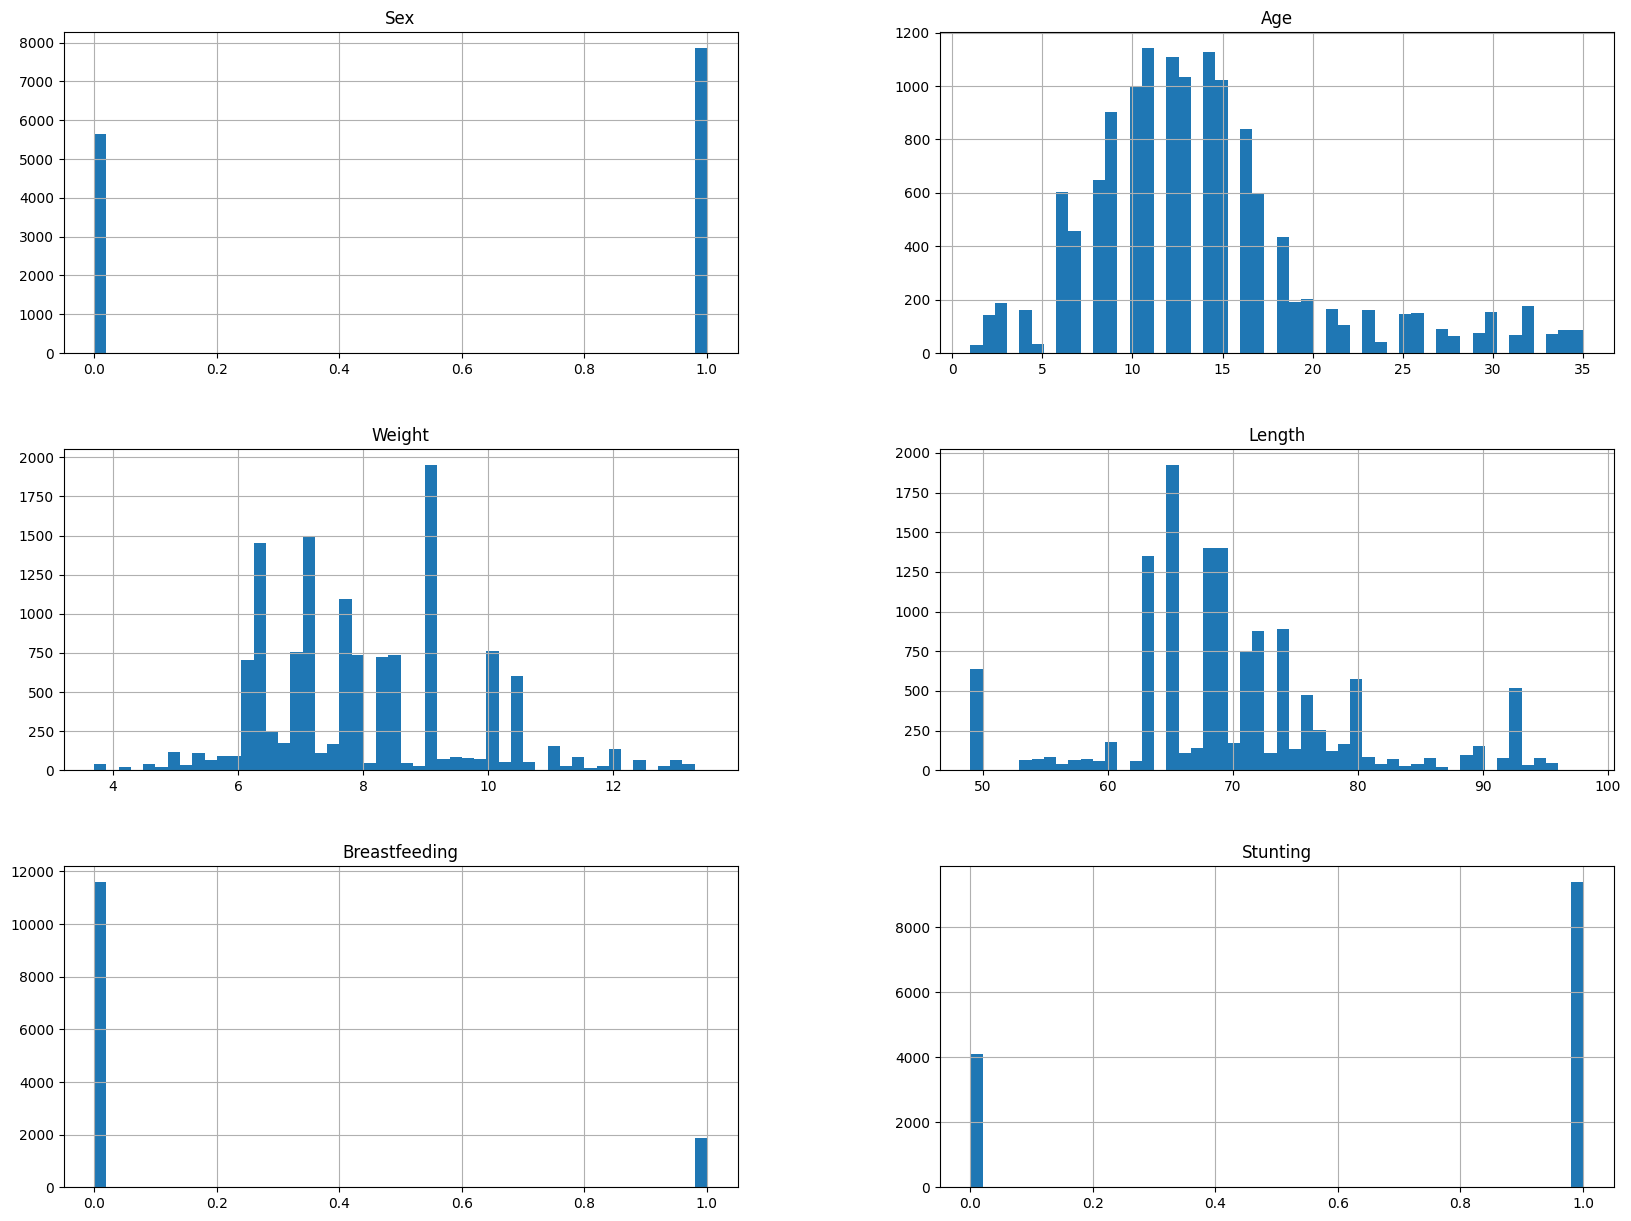

In [101]:
temp_df.hist(bins=50, figsize=(20, 15))
plt.show()

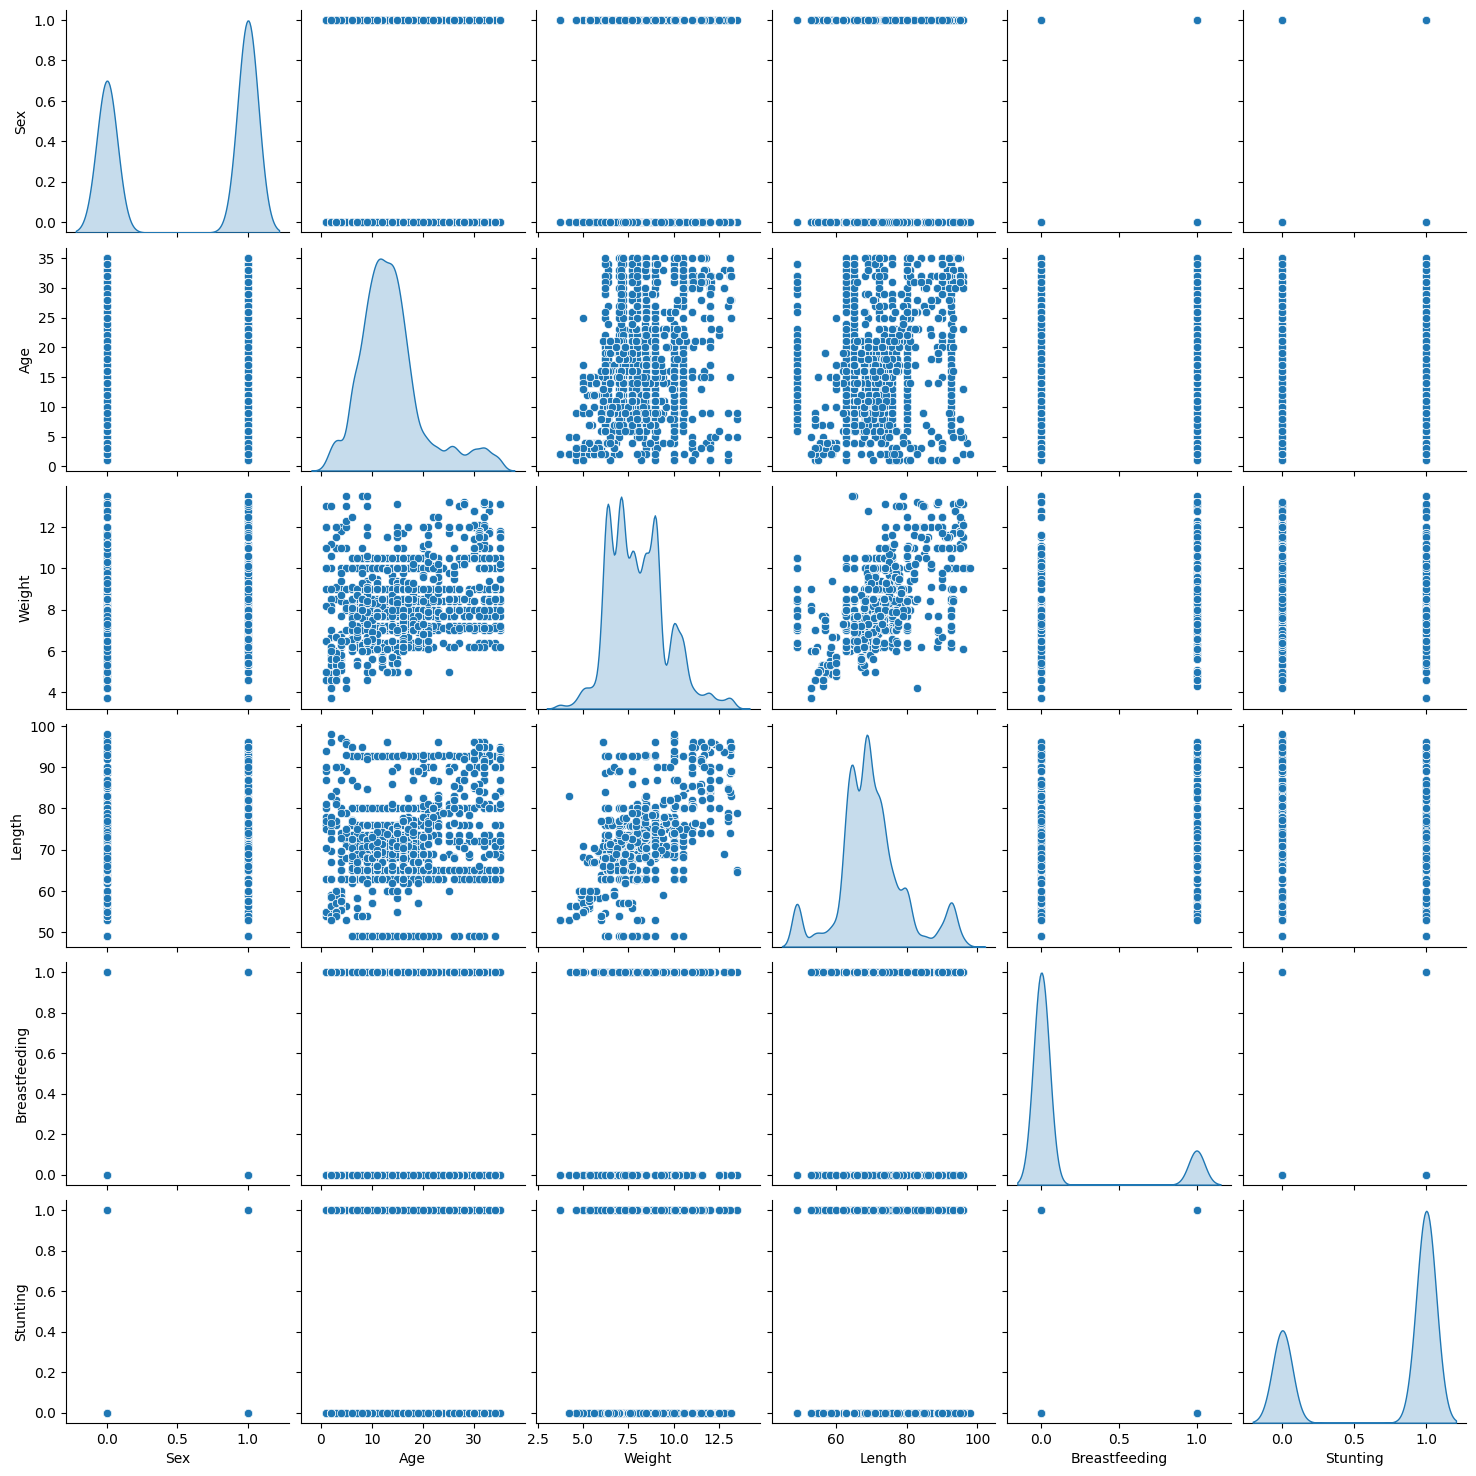

In [102]:
sns.pairplot(temp_df, diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix')

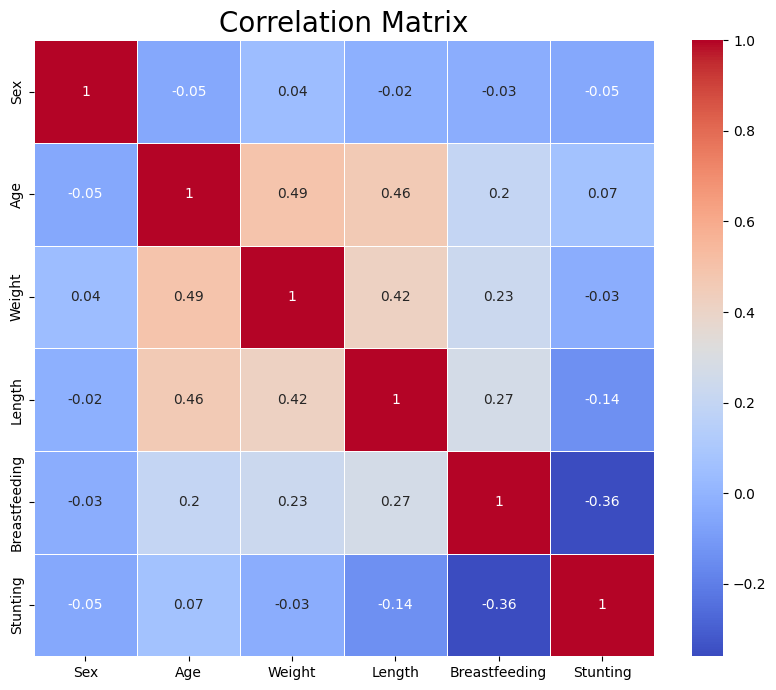

In [103]:
plt.figure(figsize=(10, 8))
correlation_matrix = temp_df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix", size=20)

In [104]:
temp_df = temp_df.drop(columns=["Breastfeeding"])
temp_df

,Sex,Age,Weight,Length,Stunting
0,1,17,10.0,72.2,0
2,1,16,8.5,72.2,1
3,1,31,6.4,63.0,1
4,1,15,10.5,49.0,1
5,0,11,8.5,65.0,0
...,...,...,...,...,...
16594,0,28,8.5,70.5,1
16596,1,9,7.3,62.0,1
16597,0,20,7.3,73.0,1
16598,1,11,7.7,66.0,1


In [105]:
scaler = StandardScaler()

standard_features = ["Age", "Weight", "Length"]

scaler.fit(temp_df[standard_features])
temp_df[standard_features] = scaler.transform(temp_df.loc[:, standard_features])
temp_df

,Sex,Age,Weight,Length,Stunting
0,1,0.495344,1.223044,0.224605,0
2,1,0.340602,0.288973,0.224605,1
3,1,2.661745,-1.018727,-0.749487,1
4,1,0.185859,1.534402,-2.231801,1
5,0,-0.433113,0.288973,-0.537728,0
...,...,...,...,...,...
16594,0,2.197516,0.288973,0.044609,1
16596,1,-0.742599,-0.458284,-0.855367,1
16597,0,0.959573,-0.458284,0.309308,1
16598,1,-0.433113,-0.209198,-0.431849,1


In [106]:
final_df = temp_df.to_csv("final_stunting_dataset.csv", index=False)